# Intrinsic and Extrinsic Noise

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k_b=10
k_d=1
T_max = 25/k_d

In [4]:
q_b = 7
q_d = 2

In [8]:
dt = .1;
no_points = 1000
nreps = 100
tau = 1/k_d
X = np.zeros(no_points)
Y = np.zeros(no_points)

for i in range(no_points):
    
    q = np.random.poisson(q_b/q_d)
    
    if q==0:
        continue
    
    for rep in range(nreps):
        x=0
        t=0
              
        while t<T_max:
            [r1,r2]=np.random.rand(2)
            p1 = k_b*q
            p2 = k_d*x
            p_net = p1+p2

            t_react = -np.log(r1)/p_net
            t=t+t_react
              
            if r2<p1/p_net:
                x=x+1
            
            else:
                x=x-1

        if rep<nreps/2:
            X[i] = X[i]+x
            
        else:
            Y[i] = Y[i]+x
        
    X[i] = X[i]/50
    Y[i] = Y[i]/50

(0, 80)

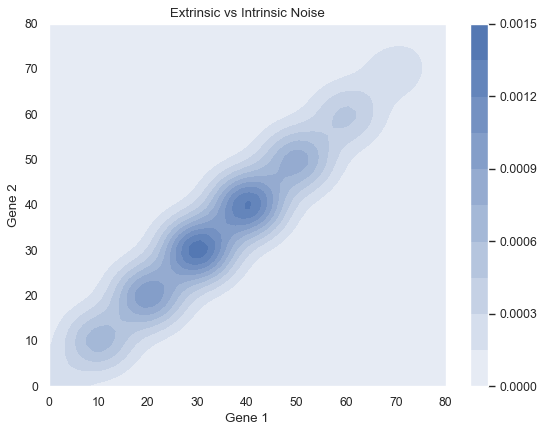

In [9]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Basic 2D density plot
sns.set_style("darkgrid")
sns.kdeplot(X,Y, shade=True,cbar=True)
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.title("Extrinsic vs Intrinsic Noise")
plt.ylim(0,80)
plt.xlim(0,80)